In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [4]:
path_save_figures = "./fig/"

if not os.path.exists(path_save_figures):
    os.makedirs(path_save_figures)

directory = "./results/"
#results DS1
exp1_DS1 = pd.read_csv(directory+"approach1/DS1/experiment1_results.csv")
exp2_DS1 = pd.read_csv(directory+"approach2/DS1/experiment1_results.csv")
#results DS2
exp1_DS2 = pd.read_csv(directory+"approach1/DS2/experiment2_results.csv")
exp2_DS2 = pd.read_csv(directory+"approach2/DS2/experiment2_results.csv")

Approach 1

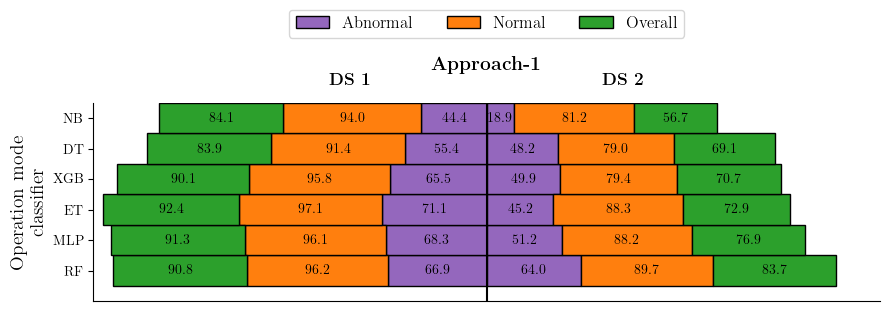

In [12]:
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font', **font)

# Data
classifiers = exp1_DS1["state_classifier"]
exp1_abnormal = exp1_DS1["Abnormal mean F1-score"]
exp1_normal = exp1_DS1["Normal mean F1-score"]
exp1_overall = exp1_DS1["Overall mean F1-score"]
exp2_abnormal = exp1_DS2["Abnormal mean F1-score"]
exp2_normal = exp1_DS2["Normal mean F1-score"]
exp2_overall = exp1_DS2["Overall mean F1-score"]

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 3.5))

# Set the height of each bar and the positions of the bars
height = 1.0
y = np.arange(len(classifiers))

# Create the diverging stacked bars
ax.barh(y, exp1_abnormal, height, left=-np.array(exp1_abnormal), label='Abnormal', color='C4', edgecolor='black')
ax.barh(y, exp2_abnormal, height, left=0, color='C4', edgecolor='black')

ax.barh(y, exp1_normal, height, left=-np.array(exp1_abnormal)-np.array(exp1_normal), label='Normal', color='C1', edgecolor='black')
ax.barh(y, exp2_normal, height, left=np.array(exp2_abnormal), color='C1', edgecolor='black')

ax.barh(y, exp1_overall, height, left=-np.array(exp1_abnormal)-np.array(exp1_normal)-np.array(exp1_overall), label='Overall', color='C2', edgecolor='black')
ax.barh(y, exp2_overall, height, left=np.array(exp2_abnormal)+np.array(exp2_normal), color='C2', edgecolor='black')

# Customize the plot
ax.set_ylabel('Operation mode \n classifier', fontweight='bold', fontsize=14)
# ax.set_xlabel('F1-score [\%]', fontweight='bold', fontsize=14)
ax.set_xlabel('', fontweight='bold', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(classifiers)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.4), ncol=3, fontsize=12)

# Add value labels on the bars
def add_value_labels(ax, spacing=0):
    for rect in ax.patches:
        width = rect.get_width()
        y = rect.get_y() + rect.get_height() / 2
        x = rect.get_x() + rect.get_width() / 2

        if width < 0:
            x = rect.get_x()
            label = f'{-width:.1f}'
            ax.annotate(label, (x, y), xytext=(-spacing, 0),
                        textcoords="offset points", ha='center', va='center', fontsize=10)
        else:
            label = f'{width:.1f}'
            ax.annotate(label, (x, y), xytext=(spacing, 0),
                        textcoords="offset points", ha='center', va='center', fontsize=10)

add_value_labels(ax)

# Add vertical lines
ax.axvline(x=0, color='k', ymax=6,linestyle='-', linewidth=1.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a title to each side
max_value = max(max(exp1_normal + exp2_normal), max(exp1_abnormal + exp2_abnormal))


ax.text(0, len(classifiers)+0.75, r'\textbf{Approach-1}', ha='center',
        va='center', fontweight='bold', fontsize=14, rotation=0)

ax.text(-max_value / 2, len(classifiers)+0.25, r'\textbf{DS 1}', ha='center',
        va='center', fontweight='bold', fontsize=12.5, rotation=0)
ax.text(max_value / 2, len(classifiers)+0.25, r'\textbf{DS 2}', ha='center',
        va='center', fontweight='bold', fontsize=12.5, rotation=0)

ax.axes.get_xaxis().set_ticks([])

xmax=ax.get_xlim()[1]
scalar=1.02
ax.set_xlim(-xmax*scalar,xmax*scalar)

ax.set_ylim(-1, 5.5)

# Adjust the layout and display the plot
plt.tight_layout()
fig1 = plt.gcf()
plt.show()

fig1.savefig(path_save_figures+'approach1.pdf', dpi=600)

Approach 2

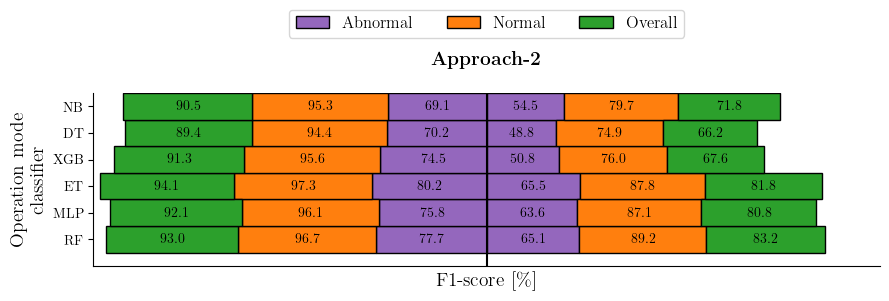

In [11]:
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font', **font)

# Data
classifiers = exp2_DS1["state_classifier"]
exp1_abnormal = exp2_DS1["Abnormal mean F1-score"]
exp1_normal = exp2_DS1["Normal mean F1-score"]
exp1_overall = exp2_DS1["Overall mean F1-score"]
exp2_abnormal = exp2_DS2["Abnormal mean F1-score"]
exp2_normal = exp2_DS2["Normal mean F1-score"]
exp2_overall = exp2_DS2["Overall mean F1-score"]

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 3.5))

# Set the height of each bar and the positions of the bars
height = 1.0
y = np.arange(len(classifiers))

# Create the diverging stacked bars
ax.barh(y, exp1_abnormal, height, left=-np.array(exp1_abnormal), label='Abnormal', color='C4', edgecolor='black')
ax.barh(y, exp2_abnormal, height, left=0, color='C4', edgecolor='black')

ax.barh(y, exp1_normal, height, left=-np.array(exp1_abnormal)-np.array(exp1_normal), label='Normal', color='C1', edgecolor='black')
ax.barh(y, exp2_normal, height, left=np.array(exp2_abnormal), color='C1', edgecolor='black')

ax.barh(y, exp1_overall, height, left=-np.array(exp1_abnormal)-np.array(exp1_normal)-np.array(exp1_overall), label='Overall', color='C2', edgecolor='black')
ax.barh(y, exp2_overall, height, left=np.array(exp2_abnormal)+np.array(exp2_normal), color='C2', edgecolor='black')

# Customize the plot
ax.set_ylabel('Operation mode \n classifier', fontweight='bold', fontsize=14)
ax.set_xlabel('F1-score [\%]', fontweight='bold', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(classifiers)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.4), ncol=3, fontsize=12)

# Add value labels on the bars
def add_value_labels(ax, spacing=0):
    for rect in ax.patches:
        width = rect.get_width()
        y = rect.get_y() + rect.get_height() / 2
        x = rect.get_x() + rect.get_width() / 2

        if width < 0:
            x = rect.get_x()
            label = f'{-width:.1f}'
            ax.annotate(label, (x, y), xytext=(-spacing, 0),
                        textcoords="offset points", ha='center', va='center', fontsize=10)
        else:
            label = f'{width:.1f}'
            ax.annotate(label, (x, y), xytext=(spacing, 0),
                        textcoords="offset points", ha='center', va='center', fontsize=10)

add_value_labels(ax)

# Add vertical lines
ax.axvline(x=0, color='k', ymax=6,linestyle='-', linewidth=1.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a title to each side
max_value = max(max(exp1_normal + exp2_normal), max(exp1_abnormal + exp2_abnormal))

ax.text(0, len(classifiers)+0.75, r'\textbf{Approach-2}', ha='center',
        va='center', fontweight='bold', fontsize=14, rotation=0)


ax.axes.get_xaxis().set_ticks([])

xmax=ax.get_xlim()[1]
scalar=1.05
ax.set_xlim(-xmax*scalar,xmax*scalar)

ax.set_ylim(-1, 5.5)

# Adjust the layout and display the plot
plt.tight_layout()
fig1 = plt.gcf()
plt.show()

fig1.savefig(path_save_figures+'approach2.pdf', dpi=900)

Approach 3

In [3]:
df_exp3 = pd.read_csv("./results/approach3/DS1/experiment1_results.csv")

df_exp3 = df_exp3.rename(columns={'cycle_classifier': 'Cycle classifier', 
                                  'state_classifier': 'State classifier',
                                  'Abnormal mean F1-score': 'Abnormal',
                                  'Normal mean F1-score': 'Normal',
                                  'Overall mean F1-score': 'Overall'})

df_exp3_sort=df_exp3.sort_values(["State classifier","Cycle classifier"])

/tmp/ipykernel_38964/1913745608.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=c, edgecolor='black') for c in ['C4', 'C1', 'C2']]


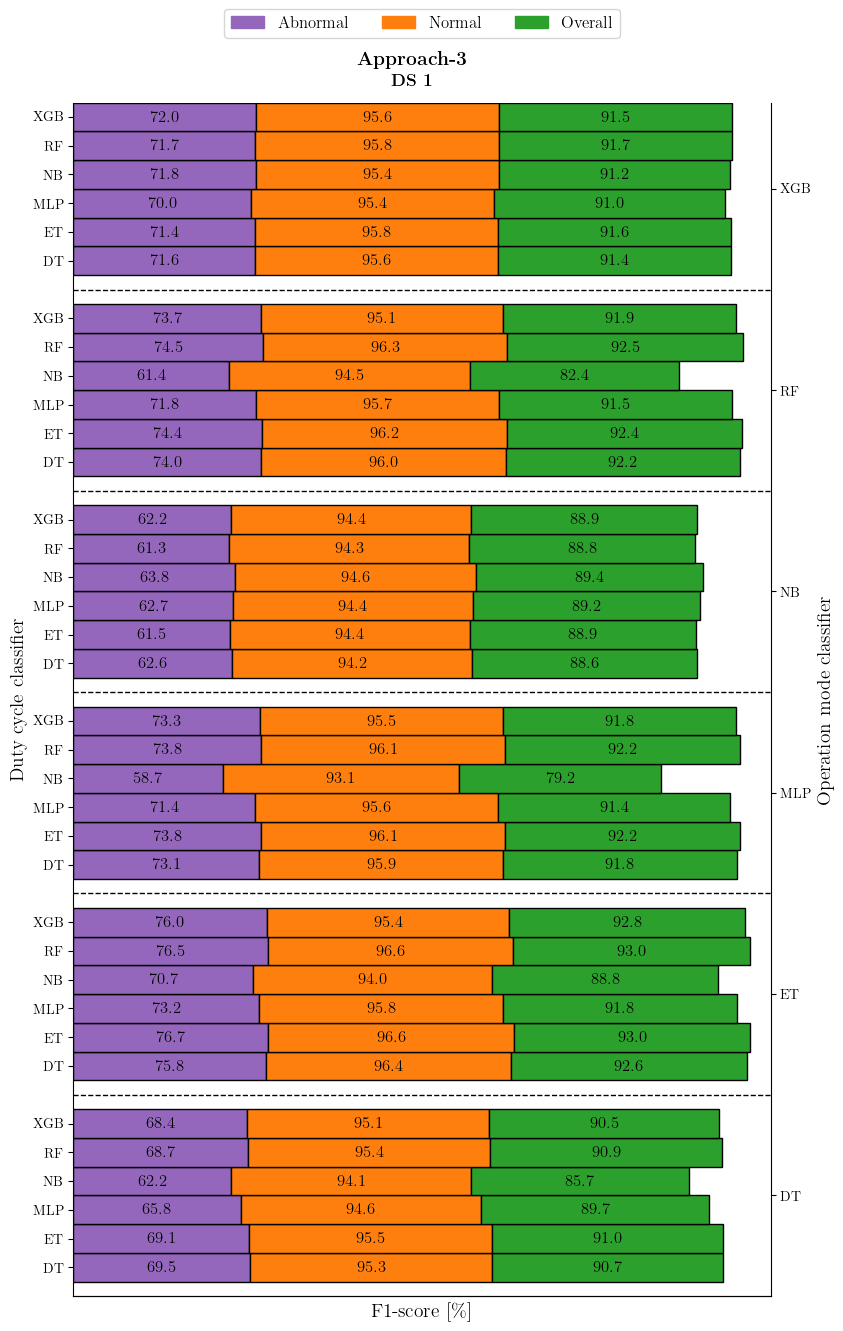

In [5]:
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font', **font)


# Set up the plot
fig, ax = plt.subplots(figsize=(9, 15.5))

# Set the height of each bar and the positions of the bars
bar_height = 1.0
# group_height = len(classifiers_state)  # Height of each Cycle classifier group (6 bars)
group_height = len(df_exp3_sort['State classifier'].unique())
space_between_groups = 1  # Extra space between groups
num_groups = len(df_exp3_sort['Cycle classifier'].unique())

# Calculate y positions for bars
y = []
for i in range(num_groups):
    y.extend(np.arange(i * (group_height + space_between_groups),
                       i * (group_height + space_between_groups) + group_height))

# Create the diverging stacked bars
for idx in range(len(df_exp3_sort)):
  ax.barh(y[idx], df_exp3_sort['Abnormal'].iloc[idx], bar_height, left=0, color='C4', edgecolor='black')
  ax.barh(y[idx], df_exp3_sort['Normal'].iloc[idx], bar_height, left=df_exp3_sort['Abnormal'].iloc[idx], color='C1', edgecolor='black')
  ax.barh(y[idx], df_exp3_sort['Overall'].iloc[idx], bar_height, left=df_exp3_sort['Abnormal'].iloc[idx]+df_exp3_sort['Normal'].iloc[idx], color='C2', edgecolor='black')

# Customize the plot
ax.set_ylabel('Duty cycle classifier', fontweight='bold', fontsize=14)
ax.set_xlabel('F1-score [\%]', fontweight='bold', fontsize=14)
ax.set_yticks(y)
# ax.set_yticklabels(df_exp3_sort['State classifier'])
ax.set_yticklabels(df_exp3_sort["Cycle classifier"].values) #NUEVO


# Add secondary y-axis for Cycle classifier
ax2 = ax.twinx()
ax2.set_ylabel('Operation mode classifier', fontweight='bold', fontsize=14)


cycle_classifier_positions = [np.mean(y[i:i+group_height]) for i in range(0, len(y), group_height)]
ax2.set_yticks(cycle_classifier_positions)


ax2.set_yticklabels(df_exp3_sort['State classifier'].unique())

# Ensure both axes have the same limits
ax.set_ylim(y[0] - bar_height/2-0.5, y[-1] + bar_height/2)
ax2.set_ylim(ax.get_ylim())

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=c, edgecolor='black') for c in ['C4', 'C1', 'C2']]
labels = ['Abnormal', 'Normal', 'Overall']
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.085), ncol=3, fontsize=12)


# Add value labels on the bars
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        width = rect.get_width()
        y = rect.get_y() + rect.get_height() / 2
        x = rect.get_x() + rect.get_width() / 2

        label = f'{abs(width):.1f}'
        ax.annotate(label, (x, y), xytext=(0, 0),
                    textcoords="offset points", ha='center', va='center', fontsize=12)

add_value_labels(ax)

# Set the x-axis limits symmetrically
max_value =df_exp3_sort['Abnormal'].max() + df_exp3_sort['Normal'].max() + df_exp3_sort['Overall'].max()
ax.set_xlim(0, max_value*1.03)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add a title to each side
ax.text(max_value/2, y[-1] + 2.0, r'\textbf{Approach-3}', ha='center', va='center',
        fontweight='bold', fontsize=14)
ax.text(max_value / 2, y[-1]+1.25, r'\textbf{DS 1}', ha='center',
        va='center', fontweight='bold', fontsize=12.5, rotation=0)


ax.axes.get_xaxis().set_ticks([])

# Add horizontal lines to separate Cycle classifiers
for i in range(1, num_groups):
    line_y = y[i * group_height - 1] + (y[i * group_height] - y[i * group_height - 1]) / 2
    ax.axhline(y=line_y, color='black', linestyle='--', linewidth=1.0)


# Adjust the layout and display the plot
# plt.tight_layout()
fig1 = plt.gcf()
plt.show()

fig1.savefig(path_save_figures+'approach3_exp1.pdf', dpi=600)

In [7]:
df_exp3 = pd.read_csv("./results/approach3/DS2/experiment2_results.csv")

df_exp3 = df_exp3.rename(columns={'cycle_classifier': 'Cycle classifier', 
                                  'state_classifier': 'State classifier',
                                  'Abnormal mean F1-score': 'Abnormal',
                                  'Normal mean F1-score': 'Normal',
                                  'Overall mean F1-score': 'Overall'})

df_exp3_sort=df_exp3.sort_values(["State classifier","Cycle classifier"])

/tmp/ipykernel_38964/9896885.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=c, edgecolor='black') for c in ['C4', 'C1', 'C2']]


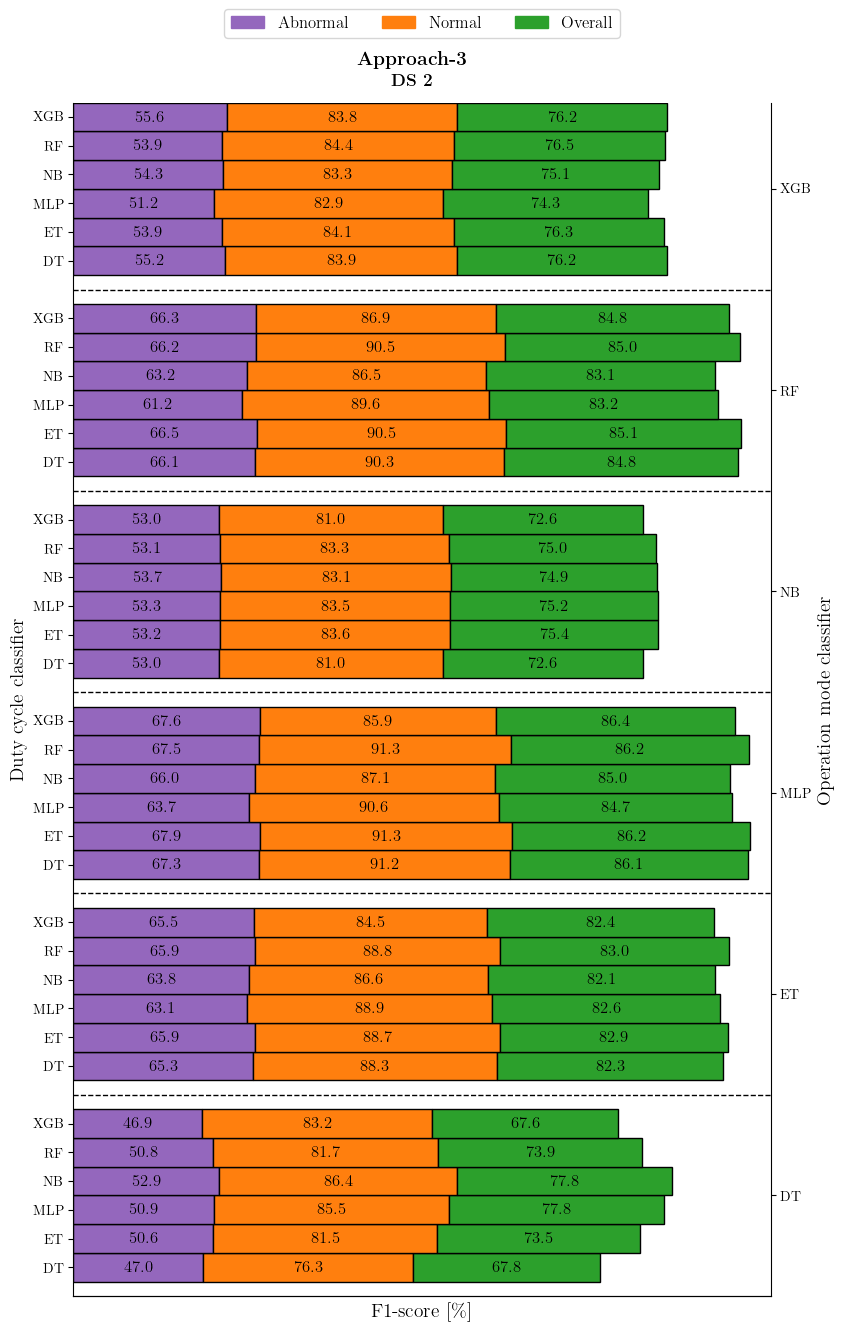

In [8]:
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font', **font)


# Set up the plot
fig, ax = plt.subplots(figsize=(9, 15.5))

# Set the height of each bar and the positions of the bars
bar_height = 1.0
# group_height = len(classifiers_state)  # Height of each Cycle classifier group (6 bars)
group_height = len(df_exp3_sort['State classifier'].unique())
space_between_groups = 1  # Extra space between groups
num_groups = len(df_exp3_sort['Cycle classifier'].unique())

# Calculate y positions for bars
y = []
for i in range(num_groups):
    y.extend(np.arange(i * (group_height + space_between_groups),
                       i * (group_height + space_between_groups) + group_height))

# Create the diverging stacked bars
for idx in range(len(df_exp3_sort)):
  ax.barh(y[idx], df_exp3_sort['Abnormal'].iloc[idx], bar_height, left=0, color='C4', edgecolor='black')
  ax.barh(y[idx], df_exp3_sort['Normal'].iloc[idx], bar_height, left=df_exp3_sort['Abnormal'].iloc[idx], color='C1', edgecolor='black')
  ax.barh(y[idx], df_exp3_sort['Overall'].iloc[idx], bar_height, left=df_exp3_sort['Abnormal'].iloc[idx]+df_exp3_sort['Normal'].iloc[idx], color='C2', edgecolor='black')

# Customize the plot
ax.set_ylabel('Duty cycle classifier', fontweight='bold', fontsize=14)
ax.set_xlabel('F1-score [\%]', fontweight='bold', fontsize=14)
ax.set_yticks(y)
# ax.set_yticklabels(df_exp3_sort['State classifier'])
ax.set_yticklabels(df_exp3_sort["Cycle classifier"].values) #NUEVO


# Add secondary y-axis for Cycle classifier
ax2 = ax.twinx()
ax2.set_ylabel('Operation mode classifier', fontweight='bold', fontsize=14)


cycle_classifier_positions = [np.mean(y[i:i+group_height]) for i in range(0, len(y), group_height)]
ax2.set_yticks(cycle_classifier_positions)


ax2.set_yticklabels(df_exp3_sort['State classifier'].unique())

# Ensure both axes have the same limits
ax.set_ylim(y[0] - bar_height/2-0.5, y[-1] + bar_height/2)
ax2.set_ylim(ax.get_ylim())

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=c, edgecolor='black') for c in ['C4', 'C1', 'C2']]
labels = ['Abnormal', 'Normal', 'Overall']
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.085), ncol=3, fontsize=12)


# Add value labels on the bars
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        width = rect.get_width()
        y = rect.get_y() + rect.get_height() / 2
        x = rect.get_x() + rect.get_width() / 2

        label = f'{abs(width):.1f}'
        ax.annotate(label, (x, y), xytext=(0, 0),
                    textcoords="offset points", ha='center', va='center', fontsize=12)

add_value_labels(ax)

# Set the x-axis limits symmetrically
max_value =df_exp3_sort['Abnormal'].max() + df_exp3_sort['Normal'].max() + df_exp3_sort['Overall'].max()
ax.set_xlim(0, max_value*1.03)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add a title to each side
ax.text(max_value/2, y[-1] + 2.0, r'\textbf{Approach-3}', ha='center', va='center',
        fontweight='bold', fontsize=14)
ax.text(max_value / 2, y[-1]+1.25, r'\textbf{DS 2}', ha='center',
        va='center', fontweight='bold', fontsize=12.5, rotation=0)


ax.axes.get_xaxis().set_ticks([])

# Add horizontal lines to separate Cycle classifiers
for i in range(1, num_groups):
    line_y = y[i * group_height - 1] + (y[i * group_height] - y[i * group_height - 1]) / 2
    ax.axhline(y=line_y, color='black', linestyle='--', linewidth=1.0)


# Adjust the layout and display the plot
fig1 = plt.gcf()
plt.show()

fig1.savefig(path_save_figures+'approach3_exp2.pdf', dpi=600)